In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import preprocess_all_data


all_data = preprocess_all_data(pd.read_csv('data_candidates.csv', sep=';', header=None),
                               pd.read_csv('data_jobs.csv', sep=';', header=None),
                               pd.read_csv('data_candidates_education.csv', sep=';', header=None),
                               pd.read_csv('data_candidates_work_places.csv', sep=';', header=None))

mask = np.random.choice([True, False], size=len(all_data), p=[0.05, 0.95])

training_data = np.asarray(all_data[~mask][all_data.columns[:-1]])
training_labels = np.asarray(all_data[~mask]['status'])
test_data = np.asarray(all_data[mask][all_data.columns[:-1]])
test_labels = np.asarray(all_data[mask]['status'])

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(34, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation=tf.nn.relu)
])


model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'mse',
              metrics=['accuracy'])

In [23]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
history = model.fit(training_data, training_labels, epochs=25, validation_split=0.1, callbacks=[early_stop])
model.evaluate(test_data, test_labels)

Epoch 1/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1730 - accuracy: 0.7461 - val_loss: 0.1334 - val_accuracy: 0.8503
Epoch 2/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1728 - accuracy: 0.7458 - val_loss: 0.1263 - val_accuracy: 0.8809
Epoch 3/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1718 - accuracy: 0.7457 - val_loss: 0.1330 - val_accuracy: 0.8560
Epoch 4/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1712 - accuracy: 0.7480 - val_loss: 0.1292 - val_accuracy: 0.8613
Epoch 5/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1710 - accuracy: 0.7480 - val_loss: 0.1251 - val_accuracy: 0.8766
Epoch 6/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1703 - accuracy: 0.7477 - val_loss: 0.1203 - val_accuracy: 0.8919
Epoch 7/25
588/588 [==============================] - 2s 3ms/step - loss: 0.1702 - accuracy: 0.7490 - val_loss: 0.1289 - val_accuracy: 0.8795
Epoch 

[0.1788783222436905, 0.7506874203681946]

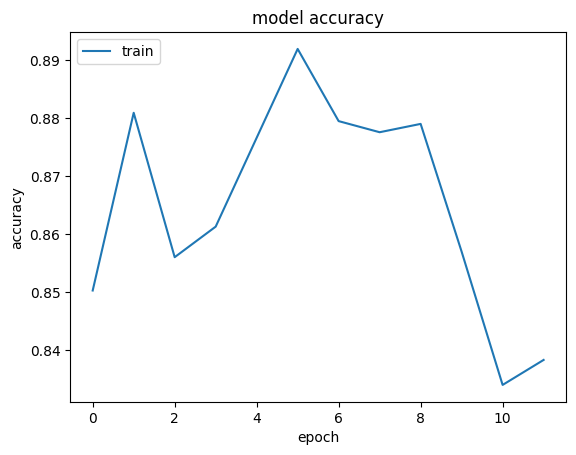

In [24]:
np.set_printoptions(suppress=True)
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

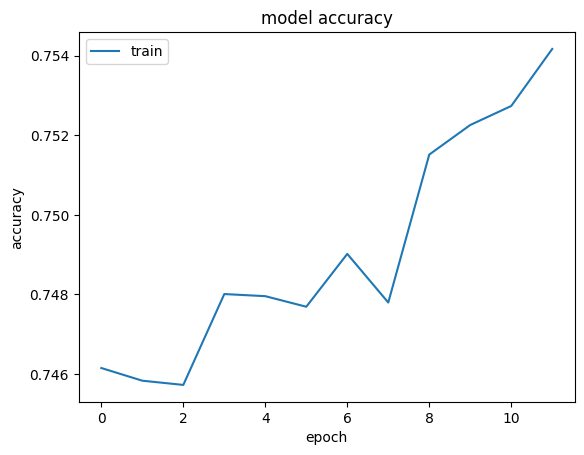

In [25]:
np.set_printoptions(suppress=True)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])